# Modelos de Mezclas

Cuando se trabaja con _Machine Learning_ usualmente se cuenta con conjuntos de $n$ datos bien agrupados<sup>[1](#grupos)</sup> en $k$ grupos, utilizados para entrenar un modelo de predicción. Los modelos de mezclas, por su parte, son útiles cuando el **conjunto $n$ de datos no se encuentra agrupado**, pero se busca dividir el conjunto en distintos grupos. El objetivo de ciertos algoritmos como K-medias, Maximización de los valores de expecación, Mezclas Gausianas, etc. es tomar el conjunto $n$ de observaciones y partirlo en $k$ grupos.

Dado que éstos no contienen información de las etiquetas de las clases, deben de ser capaces de relacionar la información dentro de un conjunto de datos, para así clasificarla.

Para entender ésto un poco mejor, imagina que tienes un archivo de datos que consisten en el historial médico de pacientes. Éste tiene información la edad de las personas, su peso y su altura, así como una etiqueta que indica si el genero del paciente. De esta manera podríamos calcular medias de cada uno de los parámetros mencionados y así podríamos tener información  para clasificar. Ahora iamgina que tienes un archivo de datos del mismo estilo, pero no tienes la información del genero del paciente. **¿Cómo podríamos identificar las mismas dos clases (M y F) del archivo de datos?** Para resolver problemas de este estilo es para lo que sirven los algoritos de clusterización que se verán a lo largo de esta libreta.

# K-medias 

Como su nombre ya lo indica, _k-means_ logra relacionar la información dentro de un conjunto de datos utilizando únicamente la media aritmética de cada $k$ grupo para clasificar los datos. El grupo con la media más _cercana_ al dato en cuestíon, será el grupo al que pertenezca. _k-means_ es entonces un método de **_clasificación no supervisada_**.

## Algoritmo estandar:
### Inicialización
1. **Escoger** de manera aleatoria $k$ valores del conjunto $n$ de datos como una primer aproximación. Éstos serán los **centroides iniciales** de las clases.
1. **Escoger** de manera aleatoria $k$ valores del conjunto $n$ de datos como una primer aproximación. Éstos serán los **centroides iniciales**<sup>[2](#centroides)</sup> de las clases.
* **Calcular la distancia** entre cada centroide y el resto de los puntos del conjunto de datos.
* **Clasificar** cada uno de los puntos dentro del grupo perteneciente al centroide más cercano, utilizando la _distancia_ más corta como parámetro de decisión.

#### En este punto se tiene separado el conjunto $n$ de puntos en $k$ grupos. Sin embargo como la elección del centroide de las clases fue hecho de manera aleatoria, no se puede asegurar aún que la clasificación es correcta. Harán falta más iteraciones con el fin de afinar la media de cada grupo para clasificar correctamente todos los puntos.
### Ciclo
4. **Calcular los nuevos centroides**.
* ¿Se movieron de lugar los centroides?
 * **Sí**, Volver al paso 2.
 * **No**, Salir del ciclo.
* **Fin**

El criterio del paso 5 usualmente viene dado dentro de un margen de error.

La siguiente animación tomada de [Wikipedia](https://en.wikipedia.org/wiki/K-means_clustering#/media/File:K-means_convergence.gif) puede ayudar para una mejor visualización del comportamiento iterativo del algoritmo:

![kmeans](../static/K-means_convergence.gif)

<br><div><p><a name="grupos"><sup>1</sup></a><sub> En el presente material se utilizan de manera indistinta las palabras: grupos, etiquetas, clasficaciones.</sub></p>
<p><a name="centroides"><sup>2</sup></a><sub> Los _centroides_ representan la media aritmética de las clases</sub></p></div>

### _K-means_ en python

El siguiente es un ejemplo ilustrativo tomado de _Python Data Science Handbook_ por Jake VanderPlas. El extracto original se puede encontrar [aquí](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html).

Primeramente se importan las librerias estándar a utilizar

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

Se generan grupos de datos (4 grupos) utilizando un método de [scikit learn](https://scikit-learn.org/stable/index.html) llamado [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html), el cual sirve para generar  puntos distribuídos de manera normal. Sólo debes de indicar el número de puntos que se desean obtener, el número de centroides (medias), la desviación estandar, entre otros. Es importante leer la [documentación completa](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) si se desea conocer más sobre los argumentos que recibe.

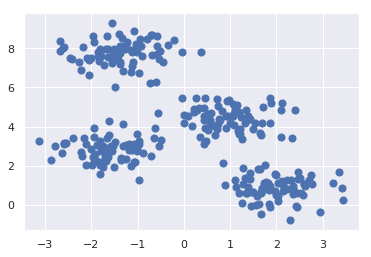

In [11]:
from sklearn.datasets.samples_generator import make_blobs

n_muestras = 300
n_centros = 4
desv_stdr = 0.60

X, y_true = make_blobs(n_samples=n_muestras, centers=n_centros,
                       cluster_std=desv_stdr, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

Ahora se importará el módulo de _scikit learn_ para realizar la clasificación, llamado [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Ése precisa de indicar el número de clases que se desea obtener. Sin embargo, nuevamente, se sugiere leer la [documentación completa](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) para mayor información.

In [24]:
from sklearn.cluster import KMeans

# se crea un objeto con la información del número de clases
# que se desean obtener
kmedias = KMeans(n_clusters=n_centros)
# se computan los centroides utilizandi 
# KMeans sobre el conjunto de datos X
y_kmedias = kmedias.fit_predict(X)

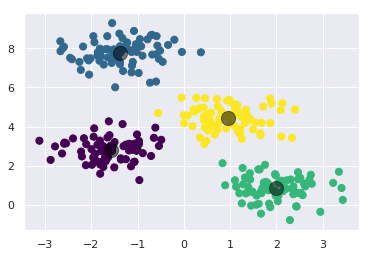

In [31]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmedias, s=50, cmap='viridis')

centros = kmedias.cluster_centers_
plt.scatter(centros[:, 0], centros[:, 1], c='black', s=200, alpha=0.5);


k-medias requiere calcular las ditancias de todos los puntos a los centroides de las clases itertatibamente hasta converger, de manera que se deben calcular todas las combinaciones posibles.Ésto convierte a k-medias en un método muy robusto de clasificación no supervisada.

El problema puede presentarse cuando se trabaja con una gran cantidad de información, ya que el número de combinaciones crecerá exponencialmente con el numero de datos, y así el tiempo de computo.

# Maximización de los valores de expectación / EM

Es un proceso iterativo utilizado para encontrar el mejor valor de expectación. Se parte de una suposición inicial de los centroides de las clases y mediane un proceso iterativo que busca maximizar la probabilidad de los puntos a pertencer a una u otra clase. 

El algoritmo EM se utiliza para encontrar maximos locales de probabilidad cuando los modelos contienen variables inferidas o [variables latentes](https://es.wikipedia.org/wiki/Variable_latente), así como datos y parámetos faltantes. El modelo parte de asumir que a cada punto de los datos conocidos le corresponde uno faltante. En partícular se busca maximizar la [probabilidad a posteriori](https://es.wikipedia.org/wiki/Probabilidad_a_posteriori) de que un punto pertenezca a una clase.
La siguiente animación tomada de [Wikipedia](https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm#/media/File:EM_Clustering_of_Old_Faithful_data.gif) muestra la convergencia del modelo.

Volviendo al ejemplo sobre las etiquetas de genero de la sección anterior, esta información son los datos faltantes que se mencionan aquí, los cuales corresponden con las etiquetas o clases del archivo de datos. 

EM asigna los puntos que deseamos clasificar a una clase en base a una probabilidad.

El algoritmo EM funciona iterativamente aplicando dos pasos:

1. **Expectación** (E): Assignar los puntos al cluster más cercano.
* **Maximización** (M): Calcular la media de las nuevas distribuciones de cada clase.

En el paso E se actualizan los valores de expectación mediane la función de probabilidad condicional de que los puntos pertenezcan a una clase:

$$Q(\theta|\theta^{(t)}) = E_{Z|X,\theta^{(t)}}[logL(\theta,X,Z]$$

En donde $X$ son los datos de observación, $Z$ son los valores falantes y $\theta$ un vector de los parámetros conocidos.

Y posteriormente se busca maximizar la expresión anterior con respecto a los parámetros $\theta$.

Si se aprender más sobre el algoritmo, fundamentación y derivación matemática, se recomiendan los siguientes artículos:

[Frank Dellaert, The Expectation Maximization Algorithm, 2002](https://www.cc.gatech.edu/~dellaert/em-paper.pdf).

[Sean Borman, The Expectation Maximization Algorithm A short tutorial](https://www.seanborman.com/publications/EM_algorithm.pdf)

[Chuong B Do & Serafim Batzoglou, What is the expectation maximization algorithm?, 2008](https://www.nature.com/articles/nbt1406)

## EM en Python

Para ejemplificar el uso de EM en Python, se utilizará el famoso ejemplo del _experimento del volado con una moneda_. Para ello se utiliza el siguiente artículo de _Nature_ publicado en _Computational Biology_: [Chuong B Do & Serafim Batzoglou](http://ai.stanford.edu/~chuongdo/papers/em_tutorial.pdf)

Primeramente imagina que tienes dos monedas, $A$ y $B$, de sesgos desconocidos, $\theta_A$ y $\theta_B$ respectivamente. Las proabilidades son entonces $\theta_A$ la probabilidad de obtener cara y $1-\theta_A$ de obtener cruz, para la moneda $A$, y similar para la moneda $B$. Nuestro objetivo es entonces conocer el sesgo $\theta = (\theta_A,\theta_B)$. Para ello se repetirán los siguientes pasos 5 veces:

1. Escoger una moneda al azar (con igual probabilidad).
2. Realizar 10 lanzamientos con la moneda elegida.

Durante el experimento guardamos el número de caras del $i$-ésimo lanzamiento, $x_i$ y una etiqueta que identifique a dicha moneda, $z_i$. Buscamos entonces conocer el máximo valor de expectación para cada moneda.

Podemos estimar $\theta_A$ y $\theta_B$ de la siguiente manera:

$$\hat{\theta}_A = \frac{n_A}{N_A}$$

y

$$\hat{\theta}_B = \frac{n_B}{N_B}$$

en donde $n_A$ es el número de caras obtenidas utilizando la moneada A y $N_A$ es el número total de lanzamientos; similar para la moneda B.

Ahora, $log P(x,z;\theta)$ es la probabilidad de obtener cualquiera de los vectores en partícular, de la cuenta del número de caras $x$ de la moneza $z$, de manera que las expresiones anteriores resolverían el problema de manera muy simple.

Ésto se parece, en nuestro ejemplo de introducción, al caso en el cual se tiene un archivo de datos completo; se conoce a qué moneda le pertenece cada conjunto de datos de los lanzamientos, así como se conocían las etiquetas del genero en nuestro ejemplo.

Ahora imaginate que sólo conocemos la información del número de caras obtenidas, pero no su identidad de a qué moneda le pertenece cada lanzamiento de dicha información. Entonces la información faltante, $Z$, son si los lanzamientos pertenecen a  la moneda A o B. 

El objetivo es determinar, para cada uno de los cinco experimentos, si los lanzamientos se hicieron utilizando la moneda A o la moneda B.

!TERMINAR EL EJEMPLO¡

# Mezclas Gausianas